In [76]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

def get_laplacian(E, n_vertices, directed=False):
    L = np.zeros((n_vertices, n_vertices))
    for e in E:
        if directed:
            L[e[1]][e[1]] += 1
            L[e[1]][e[0]] = -1
        else:
            L[e[1]][e[1]] += 1
            L[e[0]][e[0]] += 1
            L[e[1]][e[0]] = -1
            L[e[0]][e[1]] = -1
    return L

def get_cycle_graph(N):
    n_vertices = N
    E = []
    
    for i in range(N-1):
        E.append([i, i+1])
    E.append([N-1, 0])
    
    return E, n_vertices

def simulate_consensus(x_0, T, L, dt=0.001):
    x_current = x_0
    t = 0
    ts = [t]
    xs = x_0
    converged = False
    t_converged = np.inf
    while t <= T:
        x_next = x_current - np.matmul(L, x_current) * dt
        xs = np.hstack((xs, x_next))
        x_current = x_next
        t += dt
        ts.append(t)
        
        if not converged and np.amax(x_current) - np.amin(x_current) <= 0.01:
            converged = True
            t_converged = t
    
    return xs, np.array(ts), t_converged

def get_complete_graph(N):
    n_vertices = N
    E = []
    for i in range(N):
        for j in range(N):
            if j != i:
                E.append([i, j])
    
    return E, n_vertices
            

In [77]:
# Exercise 1
E = [[0, 1], [1, 2], [2, 0]]
n_vertices = 3

laplacian = get_laplacian(E, n_vertices, False)
print(laplacian)
laplacian = get_laplacian(E, n_vertices, True)
print(laplacian)

num = [5, 15, 199]

for n in num:
    E, n_vertices = get_cycle_graph(n)
    laplacian = get_laplacian(E, n_vertices, False)
    eigvals = LA.eigvals(laplacian)
    eigvals = np.sort(eigvals)
    print("C_{}: {}, {}, {}, {}".format(n, eigvals[0], eigvals[1], eigvals[-2], eigvals[-1]))

[[ 2. -1. -1.]
 [-1.  2. -1.]
 [-1. -1.  2.]]
[[ 1.  0. -1.]
 [-1.  1.  0.]
 [ 0. -1.  1.]]
C_5: -2.3841135204472906e-16, 1.381966011250104, 3.6180339887498922, 3.618033988749894
C_15: -1.5763381429605976e-16, 0.17290908471479802, 3.9562952014676034, 3.9562952014676114
C_199: 0.0, 0.00099682174765141, 3.999750779035304, 3.9997507790353337


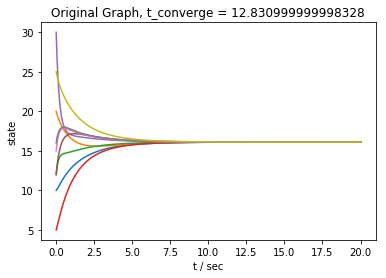

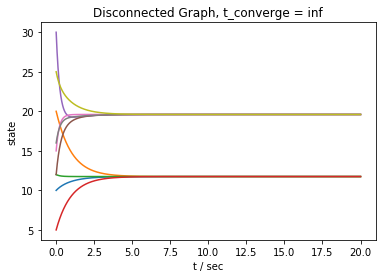

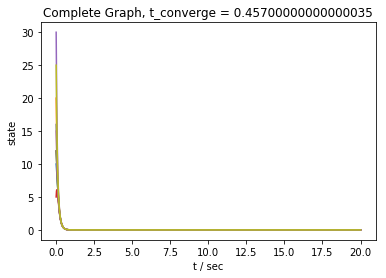

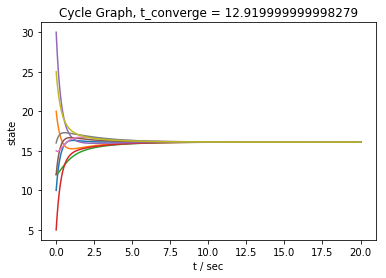

<Figure size 432x288 with 0 Axes>

In [83]:
# Exercise 2
x_0 = np.transpose(np.array([[10, 20, 12, 5, 30, 12, 15, 16, 25]]))
n_vertices = 9
E = [[0, 2], [1, 2], [2, 3], [2, 4], [2, 6], [4, 5], [4, 6], [4, 7], [5, 6], [6, 7], [6, 8]]
L = get_laplacian(E, n_vertices, False)
xs, ts, t_converge = simulate_consensus(x_0, 20, L)

#2.b
for i in range(xs.shape[0]):
    plt.plot(ts, xs[i, :])
plt.title("Original Graph, t_converge = {}".format(t_converge))
plt.xlabel('t / sec')
plt.ylabel('state')
plt.show()
plt.savefig('/home/bolun/Documents/swarmrobotics/series2/original_graph_sim.png')

#2.c
E = [[0, 2], [1, 2], [2, 3], [4, 5], [4, 6], [4, 7], [5, 6], [6, 7], [6, 8]]
L = get_laplacian(E, n_vertices, False)
xs, ts, t_converge = simulate_consensus(x_0, 20, L)

for i in range(xs.shape[0]):
    plt.plot(ts, xs[i, :])
plt.title("Disconnected Graph, t_converge = {}".format(t_converge))
plt.xlabel('t / sec')
plt.ylabel('state')
plt.show()
plt.savefig('/home/bolun/Documents/swarmrobotics/series2/disconnected_graph_sim.png')

#2.d
E, n_vertices = get_complete_graph(9)
L = get_laplacian(E, n_vertices, False)
xs, ts, t_converge = simulate_consensus(x_0, 20, L)

for i in range(xs.shape[0]):
    plt.plot(ts, xs[i, :])
plt.title("Complete Graph, t_converge = {}".format(t_converge))
plt.xlabel('t / sec')
plt.ylabel('state')
plt.show()
plt.savefig('/home/bolun/Documents/swarmrobotics/series2/complete_graph_sim.png')

#2.e
E, n_vertices = get_cycle_graph(9)
L = get_laplacian(E, n_vertices, False)
xs, ts, t_converge = simulate_consensus(x_0, 20, L)

for i in range(xs.shape[0]):
    plt.plot(ts, xs[i, :])
plt.title("Cycle Graph, t_converge = {}".format(t_converge))
plt.xlabel('t / sec')
plt.ylabel('state')
plt.show()
plt.savefig('/home/bolun/Documents/swarmrobotics/series2/cycle_graph_sim.png')


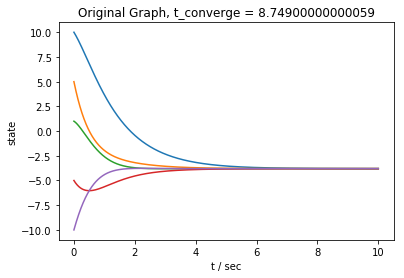

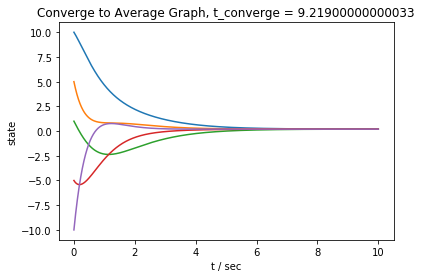

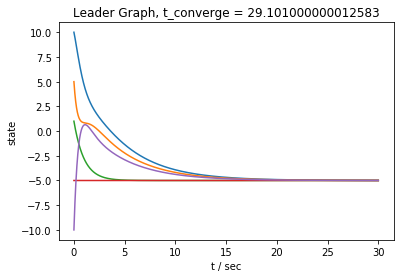

<Figure size 432x288 with 0 Axes>

In [97]:
#Exercise 3
#3.c
x_0 = np.transpose(np.array([[10, 5, 1, -5, -10]]))
n_vertices = 5
E = [[1, 0], [1, 2], [2, 4], [3, 2], [4, 1], [4, 3]]
L = get_laplacian(E, n_vertices, True)
xs, ts, t_converge = simulate_consensus(x_0, 10, L)
for i in range(xs.shape[0]):
    plt.plot(ts, xs[i, :])
plt.title("Original Graph, t_converge = {}".format(t_converge))
plt.xlabel('t / sec')
plt.ylabel('state')
plt.show()
plt.savefig('/home/bolun/Documents/swarmrobotics/series2/unchanged_graph_sim.png')

#3.d
x_0 = np.transpose(np.array([[10, 5, 1, -5, -10]]))
n_vertices = 5
E = [[0, 4], [1, 0], [2, 4], [3, 2], [4, 1], [4, 3]]
L = get_laplacian(E, n_vertices, True)
xs, ts, t_converge = simulate_consensus(x_0, 10, L)
for i in range(xs.shape[0]):
    plt.plot(ts, xs[i, :])
plt.title("Converge to Average Graph, t_converge = {}".format(t_converge))
plt.xlabel('t / sec')
plt.ylabel('state')
plt.show()
plt.savefig('/home/bolun/Documents/swarmrobotics/series2/average_graph_sim.png')

#3.e
x_0 = np.transpose(np.array([[10, 5, 1, -5, -10]]))
n_vertices = 5
E = [[0, 4], [1, 0], [2, 4], [3, 2], [4, 1]]
L = get_laplacian(E, n_vertices, True)
xs, ts, t_converge = simulate_consensus(x_0, 30, L)
for i in range(xs.shape[0]):
    plt.plot(ts, xs[i, :])
plt.title("Leader Graph, t_converge = {}".format(t_converge))
plt.xlabel('t / sec')
plt.ylabel('state')
plt.show()
plt.savefig('/home/bolun/Documents/swarmrobotics/series2/leader_graph_sim.png')